In [4]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib.pyplot as plt
import lb_fluid as lb

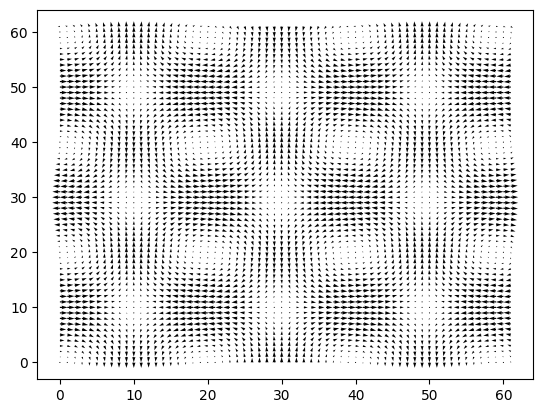

In [7]:
dr = 1
dt = 0.1
shape = (9, int(2*np.pi*100), int(2*np.pi*100))
lat = lb.D2Q9FluidNVT(shape, dr, dt, visc=0.01, u=(0.14, 0.1), rho=1.0, force=(0.0, 0.0), test_case='taylor-green')

In [8]:

import matplotlib.animation as animation

def animate_lat(lat, nsteps):
    fig, ax = plt.subplots()
    im = ax.imshow(lat.rho, cmap='viridis', animated=True)

    def update(frame):
        lat.update_macro()
        lat.update_feq()
        lat.update_f_he()
        lat.stream()
        im.set_array(lat.rho)
        return im,

    ani = animation.FuncAnimation(fig, update, frames=nsteps, interval=200, blit=True)
    plt.close(fig)
    return ani

nsteps = 1000
animation = animate_lat(lat, nsteps)
animation.save('test_case.gif', writer='imagemagick', fps=10)


MovieWriter imagemagick unavailable; using Pillow instead.
